In [1]:
import pickle
import numpy as np
from ydata_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../data/")
from data_getter import get_glocalkd_dataset, get_timeseries, get_npz_dataset

In [2]:
def analyze_distance_matrix(pickle_path, y, dist_name, data_name):
    with open(pickle_path, "rb") as f:
        distance = pickle.load(f)
        
    matrix = distance.distance_matrix
    #print(f"number of nans {np.isnan(matrix).sum()}")
    #plt.hist(matrix.flatten(), bins=100)
    #plt.title("Flattened distance matrix histogram")
    #plt.show()
    
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    for i, statistic in enumerate(["mean", "max", "median"]):
        if statistic == "median":
            vector = np.nanmedian(matrix, axis=1)
        else:
            vector = getattr(matrix, statistic)(axis=1)


        df = pd.DataFrame({"dist_sum": vector, "y":y})
        df.groupby("y").dist_sum.hist(alpha=0.4, legend=True, ax=ax[i], bins=50)
        #ax[i].set_ylim(0,100)
        ax[i].set_xlabel(f"{statistic} distance to all objects")
        ax[i].set_ylabel(f"number of objects")
        ax[i].set_title(f"{dist_name} {statistic} distance for {data_name}")



In [2]:
def get_dataset(data_dir, name, f):
    data = f(data_dir, name)
    return data["X"], data["y"]

In [3]:
#X = get_glocalkd_dataset("../data/graph", "IMDB-BINARY")["X_graph"]
X = get_glocalkd_dataset("../data/graph", "DD")["X_graph"]

In [18]:
X[0].nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [19]:
X[1].nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [32]:
len(X[0].nodes[3]['label'])

89

In [35]:
print(X[0].nodes[1]['label'])

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [28]:
import os
import networkx as nx
def tud_to_networkx(data_folder, ds_name):
    with open(data_folder + ds_name + "/" + ds_name + "_graph_indicator.txt", "r") as f:
        graph_indicator = [int(i) - 1 for i in list(f)]
    f.closed

    # Nodes.
    num_graphs = max(graph_indicator)
    node_indices = []
    offset = []
    c = 0

    for i in range(num_graphs + 1):
        offset.append(c)
        c_i = graph_indicator.count(i)
        node_indices.append((c, c + c_i - 1))
        c += c_i

    graph_db = []
    for i in node_indices:
        g = nx.Graph()
        for j in range(i[1] - i[0] + 1):
            g.add_node(j)

        graph_db.append(g)

    # Edges.
    with open(data_folder + ds_name + "/" + ds_name + "_A.txt", "r") as f:
        edges = [i.split(",") for i in list(f)]
    f.closed

    edges = [(int(e[0].strip()) - 1, int(e[1].strip()) - 1) for e in edges]
    edge_list = []
    edgeb_list = []
    for e in edges:
        g_id = graph_indicator[e[0]]
        g = graph_db[g_id]
        off = offset[g_id]

        # Avoid multigraph (for edge_list)
        if ((e[0] - off, e[1] - off) not in list(g.edges())) and (
            (e[1] - off, e[0] - off) not in list(g.edges())
        ):
            g.add_edge(e[0] - off, e[1] - off)
            edge_list.append((e[0] - off, e[1] - off))
            edgeb_list.append(True)
        else:
            edgeb_list.append(False)

    # Node labels.
    if os.path.exists(data_folder + ds_name + "/" + ds_name + "_node_labels.txt"):
        with open(data_folder + ds_name + "/" + ds_name + "_node_labels.txt", "r") as f:
            node_labels = [str.strip(i) for i in list(f)]
        f.closed

        node_labels = [i.split(",") for i in node_labels]
        int_labels = []
        for i in range(len(node_labels)):
            int_labels.append([int(j) for j in node_labels[i]])

        i = 0
        for g in graph_db:
            for v in range(g.number_of_nodes()):
                g.nodes[v]["labels"] = int_labels[i]
                i += 1

    # Node Attributes.
    if os.path.exists(data_folder + ds_name + "/" + ds_name + "_node_attributes.txt"):
        with open(
            data_folder + ds_name + "/" + ds_name + "_node_attributes.txt", "r"
        ) as f:
            node_attributes = [str.strip(i) for i in list(f)]
        f.closed

        node_attributes = [i.split(",") for i in node_attributes]
        float_attributes = []
        for i in range(len(node_attributes)):
            float_attributes.append([float(j) for j in node_attributes[i]])
        i = 0
        for g in graph_db:
            for v in range(g.number_of_nodes()):
                g.nodes[v]["attributes"] = float_attributes[i]
                i += 1

    # Edge Labels.
    if os.path.exists(data_folder + ds_name + "/" + ds_name + "_edge_labels.txt"):
        with open(data_folder + ds_name + "/" + ds_name + "_edge_labels.txt", "r") as f:
            edge_labels = [str.strip(i) for i in list(f)]
        f.closed

        edge_labels = [i.split(",") for i in edge_labels]
        e_labels = []
        for i in range(len(edge_labels)):
            if edgeb_list[i]:
                e_labels.append([int(j) for j in edge_labels[i]])

        i = 0
        for g in graph_db:
            for e in range(g.number_of_edges()):
                g.edges[edge_list[i]]["labels"] = e_labels[i]
                i += 1

    # Edge Attributes.
    if os.path.exists(data_folder + ds_name + "/" + ds_name + "_edge_attributes.txt"):
        with open(
            data_folder + ds_name + "/" + ds_name + "_edge_attributes.txt", "r"
        ) as f:
            edge_attributes = [str.strip(i) for i in list(f)]
        f.closed

        edge_attributes = [i.split(",") for i in edge_attributes]
        e_attributes = []
        for i in range(len(edge_attributes)):
            if edgeb_list[i]:
                e_attributes.append([float(j) for j in edge_attributes[i]])

        i = 0
        for g in graph_db:
            for e in range(g.number_of_edges()):
                g.edges[edge_list[i]]["attributes"] = e_attributes[i]
                i += 1

    # Classes.
    if os.path.exists(data_folder + ds_name + "/" + ds_name + "_graph_labels.txt"):
        with open(
            data_folder + ds_name + "/" + ds_name + "_graph_labels.txt", "r"
        ) as f:
            classes = [str.strip(i) for i in list(f)]
        f.closed
        classes = [i.split(",") for i in classes]
        cs = []
        for i in range(len(classes)):
            cs.append([int(j) for j in classes[i]])

        i = 0
        for g in graph_db:
            g.graph["classes"] = cs[i]
            i += 1

    # Targets.
    if os.path.exists(data_folder + ds_name + "/" + ds_name + "_graph_attributes.txt"):
        with open(
            data_folder + ds_name + "/" + ds_name + "_graph_attributes.txt", "r"
        ) as f:
            targets = [str.strip(i) for i in list(f)]
        f.closed

        targets = [i.split(",") for i in targets]
        ts = []
        for i in range(len(targets)):
            ts.append([float(j) for j in targets[i]])

        i = 0
        for g in graph_db:
            g.graph["targets"] = ts[i]
            i += 1

    return graph_db

data = tud_to_networkx("../data/graph/", "DD")

In [36]:
data[0].nodes[1]['labels']

[2]

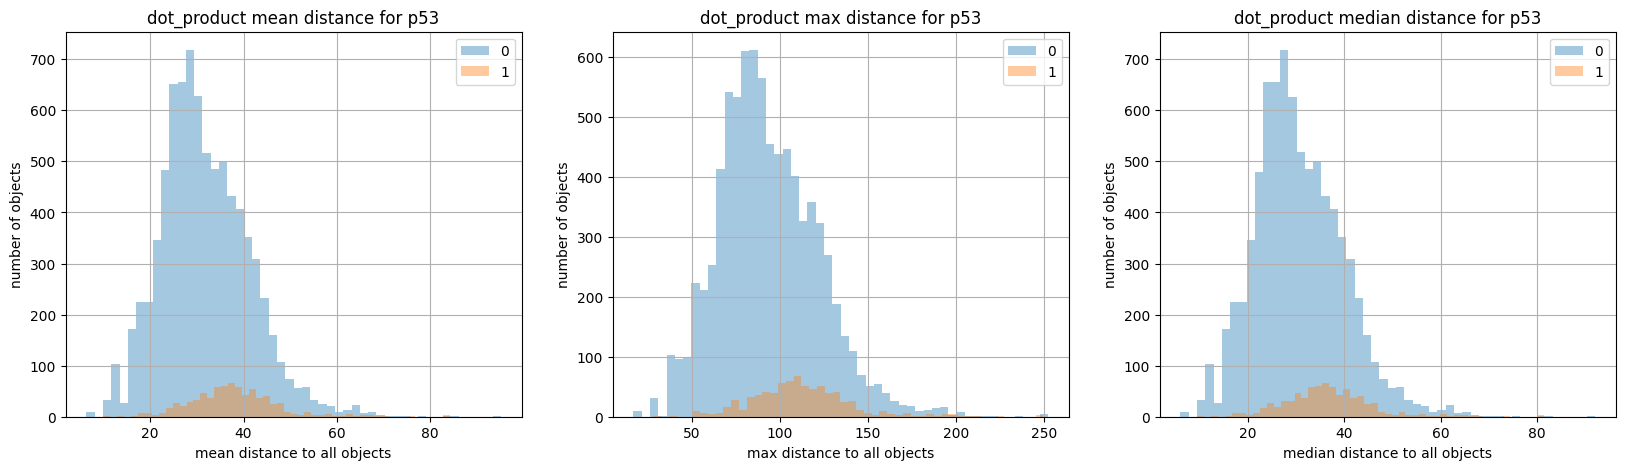

In [24]:
data_name = "p53"
X, y = get_dataset("../data/graph", data_name, get_glocalkd_dataset)
analyze_distance_matrix("../precomputed_distances/p53_function.pickle", y, "dot_product", data_name)

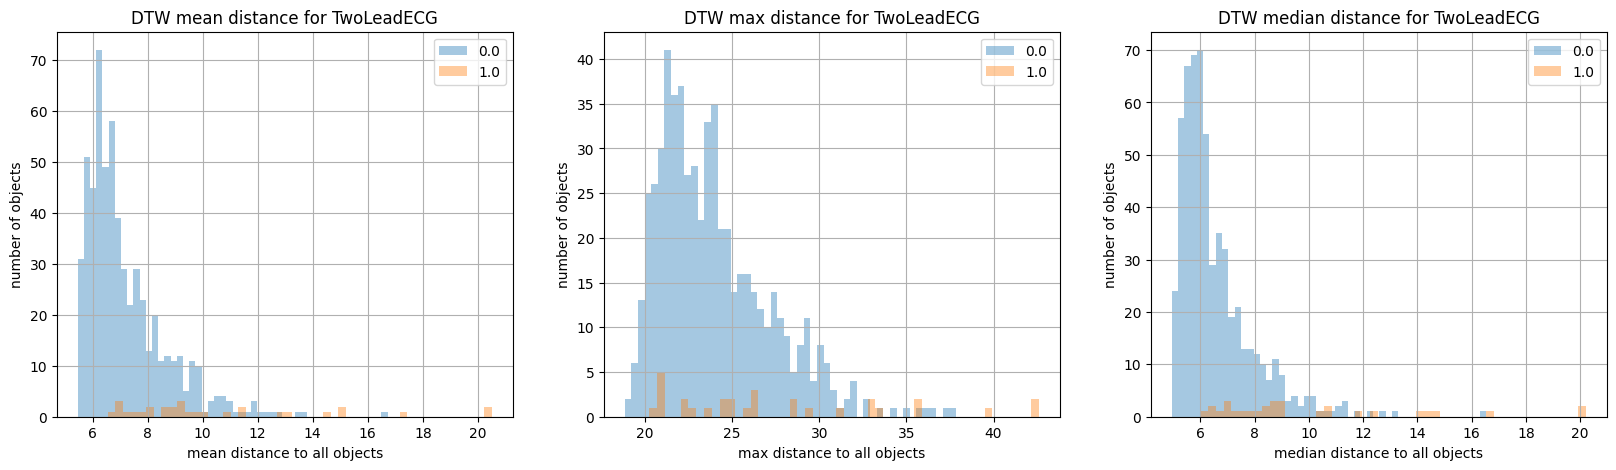

In [25]:
data_name = "TwoLeadECG"
X, y = get_dataset("../data/timeseries", data_name, get_timeseries)

analyze_distance_matrix("../precomputed_distances/TwoLeadECG_DTWDist.pickle", y, "DTW", data_name)

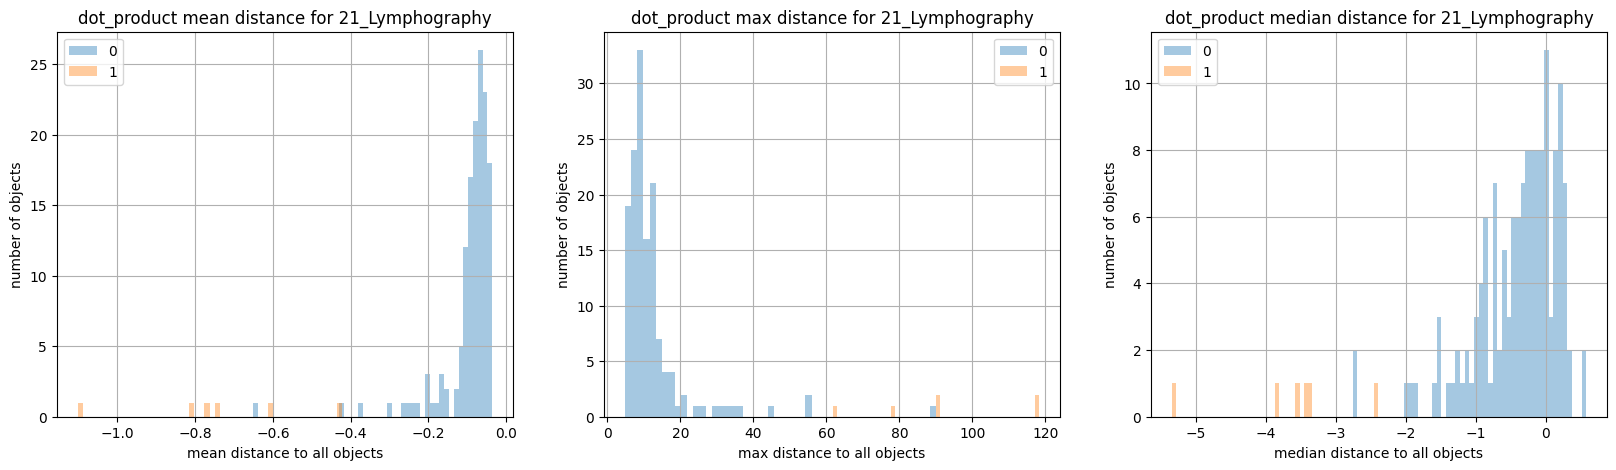

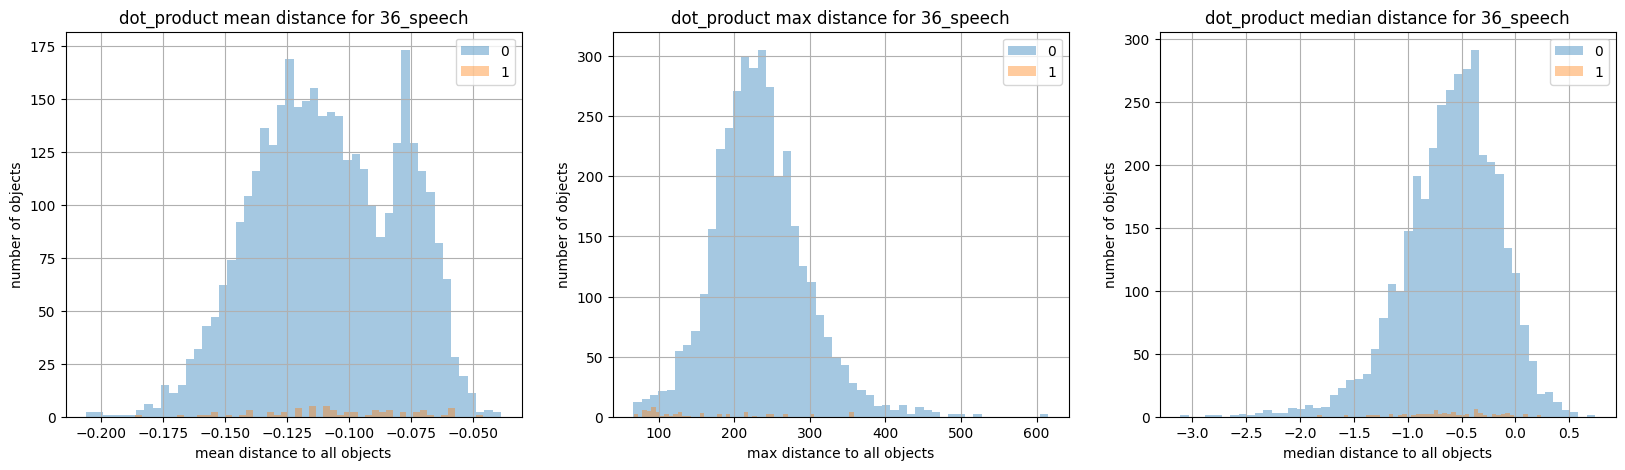

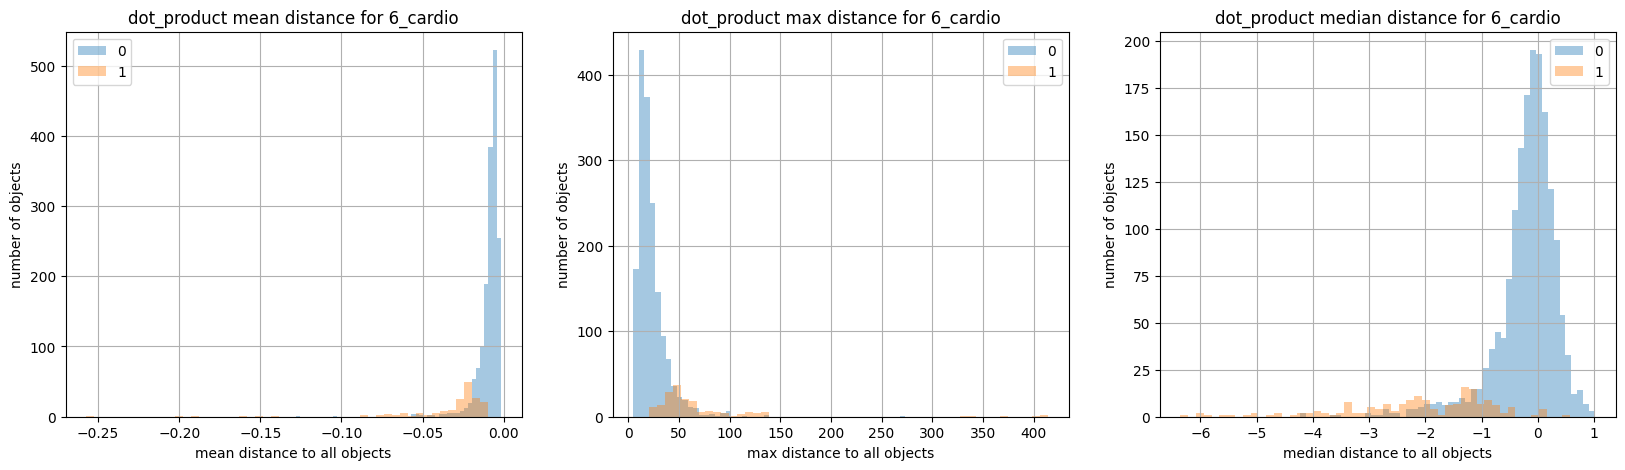

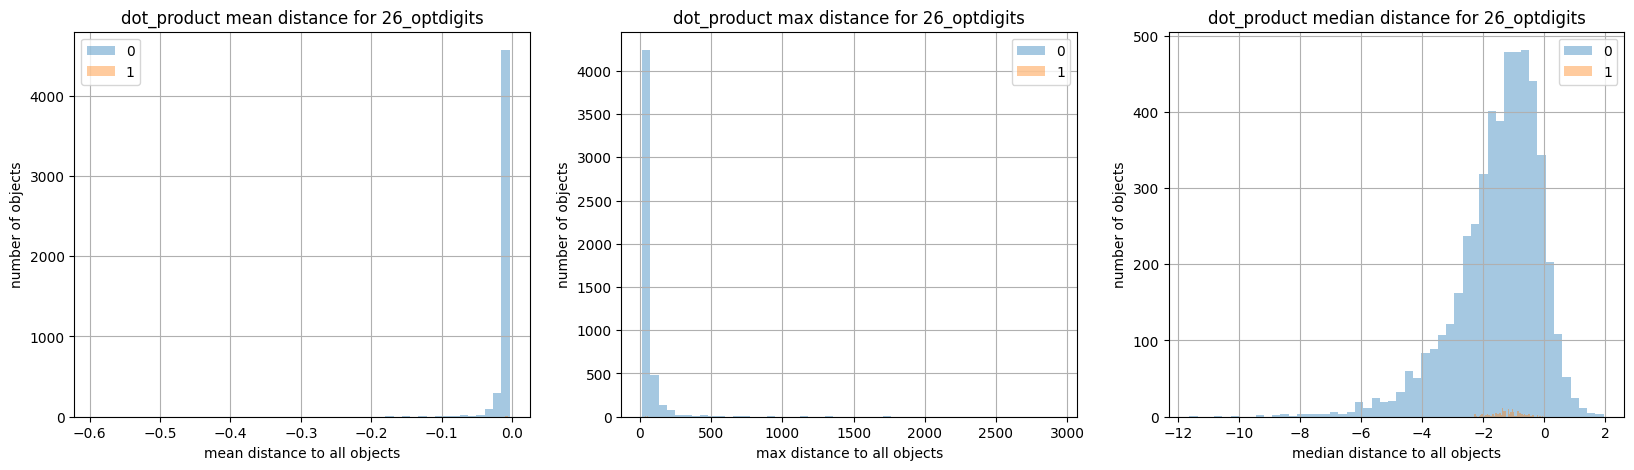

In [26]:
from pathlib import Path

for data_name in ["21_Lymphography", "36_speech", "6_cardio", "26_optdigits"]:
    y = get_npz_dataset(Path(f"../data/numerical/{data_name}.npz"))['y']
    analyze_distance_matrix(f"../precomputed_distances/{data_name}_function.pickle", y, "dot_product", data_name)